| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.IMPUTACION_DE_DATOS.ipynb)| [⏩](./3.SELECCION_DE_CARACTERISTICAS.ipynb)|

# **2. TRATAMIENTO DE OUTLIERS**

## **Detección usando diagramas de cajas**

La detección usando diagramas de caja, también conocida como detección de valores atípicos o detección de outliers, es una técnica utilizada en análisis de datos para identificar observaciones inusuales o anómalas en un conjunto de datos. Un diagrama de caja, también llamado `boxplot`, proporciona una representación visual de la distribución de los datos, mostrando información sobre la mediana, los cuartiles, los valores mínimo y máximo y los valores atípicos potenciales.

Aquí tienes un ejemplo de cómo realizar la detección de valores atípicos utilizando diagramas de caja en Python:

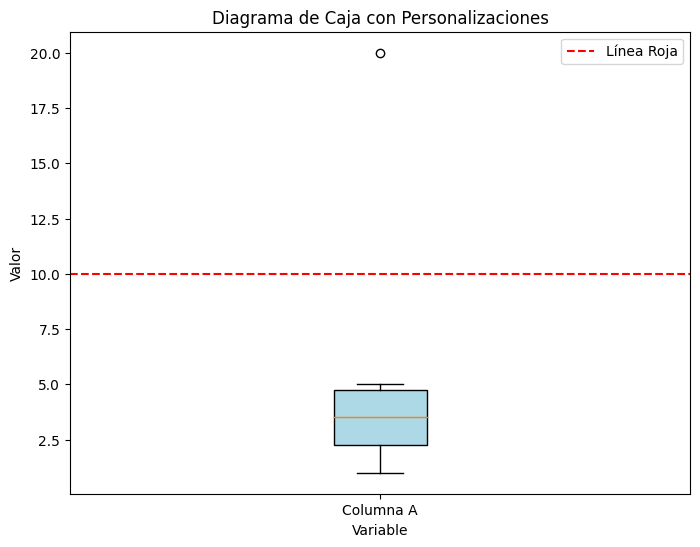

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un dataframe de ejemplo
data = pd.DataFrame({'A': [1, 2, 3, 4, 5, 20]})

# Generar el diagrama de caja con personalizaciones
plt.figure(figsize=(8, 6))

# Añadir colores y estilo a la caja y los bigotes
box = plt.boxplot(data['A'], patch_artist=True)
colors = ['lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Añadir líneas adicionales
plt.axhline(y=10, color='red', linestyle='--', label='Línea Roja')

# Personalizar ejes y título
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Diagrama de Caja con Personalizaciones')

# Añadir etiquetas personalizadas
plt.xticks([1], ['Columna A'])

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En este ejemplo, creamos un dataframe data con una sola columna llamada '`A`' que contiene algunos valores numéricos. Luego, utilizamos `plt.boxplot()` para generar el diagrama de caja de la variable '`A`'. El eje `x` del diagrama representa la variable y el eje `y` representa el valor. El diagrama muestra una caja que representa el rango intercuartil (`IQR`), con una línea en el medio que indica la mediana. Los "bigotes" del diagrama se extienden hasta los valores mínimo y máximo dentro de un rango determinado. Además, se pueden mostrar puntos individuales como posibles valores atípicos.

En el ejemplo anterior, podemos observar que el valor 20 se encuentra fuera del rango esperado en comparación con los otros valores (1, 2, 3, 4 y 5). Este valor podría ser considerado un valor atípico o un posible error en los datos. La detección de valores atípicos mediante diagramas de caja puede ser útil para identificar observaciones inusuales que podrían requerir una mayor investigación o análisis adicional.

Es importante tener en cuenta que la interpretación de los valores atípicos depende del contexto y la naturaleza de los datos. No todos los valores atípicos son necesariamente errores o anomalías; en algunos casos, pueden ser valores válidos y significativos. Por lo tanto, es esencial comprender el dominio de los datos y el propósito del análisis antes de tomar decisiones basadas en los valores atípicos detectados.

Espero que esta explicación y ejemplo te hayan sido útiles para comprender la detección de valores atípicos utilizando diagramas de caja en Python. Si tienes más preguntas, no dudes en hacerlas.

## **Método del Rango intercuartílico**

El método del rango intercuartílico es una técnica utilizada para detectar valores atípicos en un conjunto de datos. Se basa en la diferencia entre el tercer cuartil ($Q3$) y el primer cuartil ($Q1$) de una distribución. Los valores que están por debajo de $Q1 - 1.5 * IQR$ o por encima de $Q3 + 1.5 * IQR$ se consideran valores atípicos y pueden ser identificados utilizando este método.

Aquí tienes un ejemplo de cómo aplicar el método del rango intercuartílico en Python para detectar valores atípicos:

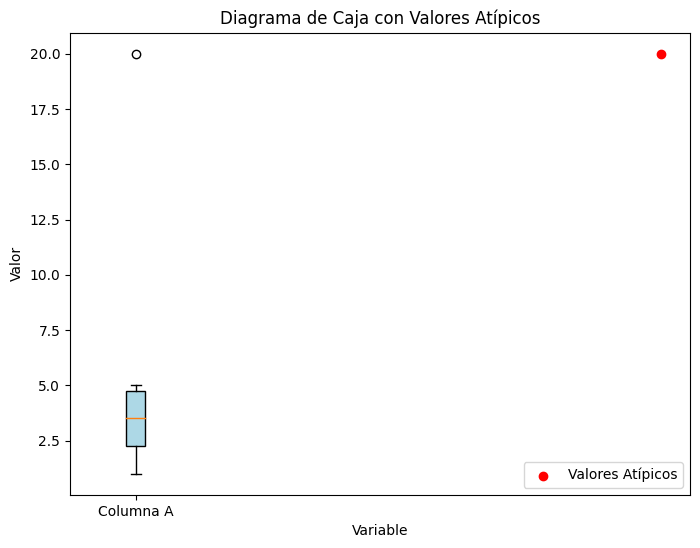

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un dataframe de ejemplo
data = pd.DataFrame({'A': [1, 2, 3, 4, 5, 20]})

# Calcular el rango intercuartílico
Q1 = data['A'].quantile(0.25)
Q3 = data['A'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para detectar valores atípicos
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Identificar valores atípicos
outliers = data[(data['A'] < lower_limit) | (data['A'] > upper_limit)]

# Generar el diagrama de caja con valores atípicos
plt.figure(figsize=(8, 6))

# Boxplot con colores
box = plt.boxplot(data['A'], patch_artist=True)
colors = ['lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Puntos rojos para valores atípicos
plt.scatter(outliers.index, outliers['A'], color='red', label='Valores Atípicos')

# Personalizar ejes y título
plt.xlabel('Variable')
plt.ylabel('Valor')
plt.title('Diagrama de Caja con Valores Atípicos')

# Añadir etiquetas personalizadas
plt.xticks([1], ['Columna A'])

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

En este ejemplo, utilizamos el mismo dataframe data que en el ejemplo anterior. Calculamos el rango intercuartílico $(IQR)$ de la variable '$A$' utilizando la función `quantile()` de Pandas para obtener los valores del primer cuartil $(Q1)$ y el tercer cuartil $(Q3)$. A continuación, definimos los límites inferior y superior para detectar valores atípicos multiplicando el $IQR$ por 1.5. Cualquier valor que esté por debajo del límite inferior o por encima del límite superior se considerará un valor atípico.

Luego, utilizamos una condición booleana para identificar los valores atípicos en el dataframe original y los almacenamos en la variable outliers. Finalmente, generamos el diagrama de caja y utilizamos `plt.scatter()` para resaltar los valores atípicos en color rojo.

En el ejemplo anterior, el valor 20 se identifica como un valor atípico, ya que está por encima del límite superior calculado utilizando el método del rango intercuartílico.

Recuerda que la interpretación de los valores atípicos depende del contexto y la naturaleza de los datos. No todos los valores atípicos son necesariamente errores o anomalías; en algunos casos, pueden ser valores válidos y significativos. Por lo tanto, es importante analizar y comprender el significado de los valores atípicos antes de tomar decisiones basadas en ellos.

Espero que esta explicación y ejemplo te hayan sido útiles para comprender el método del rango intercuartílico y su aplicación en la detección de valores atípicos en Python. Si tienes más preguntas, no dudes en hacerlas.

## **Libreria PyOD**

`PyOD` es una biblioteca de Python diseñada para la detección de valores atípicos (`outliers`) en conjuntos de datos. `PyOD` proporciona una amplia gama de algoritmos de detección de anomalías, incluyendo métodos estadísticos, basados en aprendizaje automático y técnicas de agrupamiento. Está diseñada para ser fácil de usar y compatible con otras bibliotecas populares de Python, como `NumPy`, `Pandas` y `Matplotlib`.

A continuación, te mostraré un ejemplo de cómo utilizar `PyOD` para detectar valores atípicos en un conjunto de datos utilizando el algoritmo Isolation Forest:

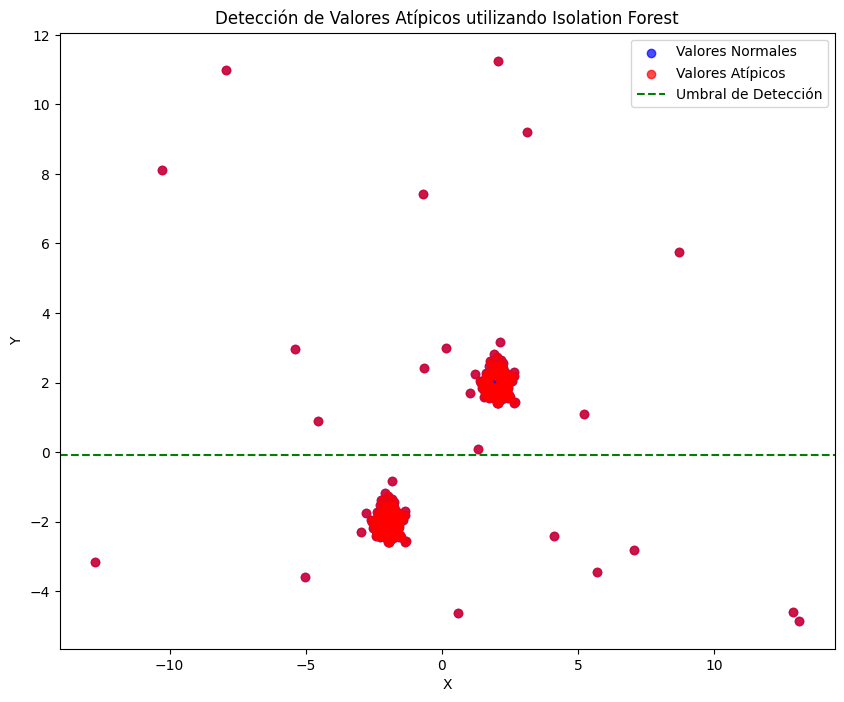

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest

# Generar datos de ejemplo
np.random.seed(42)
n_samples = 200
outliers_fraction = 0.1
n_outliers = int(n_samples * outliers_fraction)
n_inliers = n_samples - n_outliers

X = 0.3 * np.random.randn(n_inliers, 2)
X = np.r_[X + 2, X - 2]
outliers = 6 * np.random.randn(n_outliers, 2)
X = np.r_[X, outliers]

# Entrenar el modelo Isolation Forest
model = IForest(contamination=outliers_fraction)
model.fit(X)

# Obtener la puntuación de anomalía para cada muestra
scores = model.decision_function(X)

# Establecer un umbral para la detección de anomalías
threshold = np.percentile(scores, 100 * outliers_fraction)

# Identificar los puntos anómalos
anomalies = np.where(scores > threshold)[0]

# Generar el gráfico con personalizaciones
plt.figure(figsize=(10, 8))

# Puntos normales en azul
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Valores Normales', alpha=0.7)

# Puntos anómalos en rojo
plt.scatter(X[anomalies, 0], X[anomalies, 1], color='red', label='Valores Atípicos', alpha=0.7)

# Umbral como línea punteada
plt.axhline(y=threshold, color='green', linestyle='--', label='Umbral de Detección')

# Personalizar ejes y título
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Detección de Valores Atípicos utilizando Isolation Forest')
plt.legend()

# Mostrar el gráfico
plt.show()

En este ejemplo, generamos un conjunto de datos de ejemplo que contiene tanto valores normales como valores atípicos. Utilizamos el algoritmo Isolation Forest de `PyOD` para entrenar un modelo de detección de anomalías en estos datos. Luego, obtenemos la puntuación de anomalía para cada muestra y establecemos un umbral para identificar los valores atípicos. Los puntos con puntuaciones de anomalía por encima del umbral se consideran valores atípicos y se resaltan en el gráfico con color rojo.

Es importante destacar que `PyOD` proporciona una amplia gama de algoritmos de detección de anomalías, como `LOF` (Local Outlier Factor), `HBOS` (Histogram-based Outlier Score), entre otros. Puedes explorar diferentes algoritmos y ajustar sus parámetros según tus necesidades y características del conjunto de datos.

Espero que esta explicación y ejemplo te hayan ayudado a comprender el uso de la biblioteca `PyOD` para la detección de valores atípicos en Python. Si tienes más preguntas, no dudes en hacerlas.

## **Diversas estrategías de detección con PyOD**

`PyOD` (Python Outlier Detection) es una biblioteca de detección de valores atípicos en Python que proporciona diversas estrategias para identificar y detectar puntos anómalos en conjuntos de datos. Estas estrategias se basan en algoritmos de aprendizaje automático y técnicas estadísticas. A continuación, se presentan algunas de las estrategias de detección disponibles en PyOD:

* **Isolation Forest (iForest):** Este algoritmo utiliza un árbol de aislamiento para detectar valores atípicos. Divide de manera aleatoria los datos en diferentes ramas de manera eficiente y cuantifica la anomalía en función del número de divisiones necesarias para aislar una muestra. Cuanto menos divisiones sean necesarias, más anómala se considera la muestra. Veamos un ejemplo:

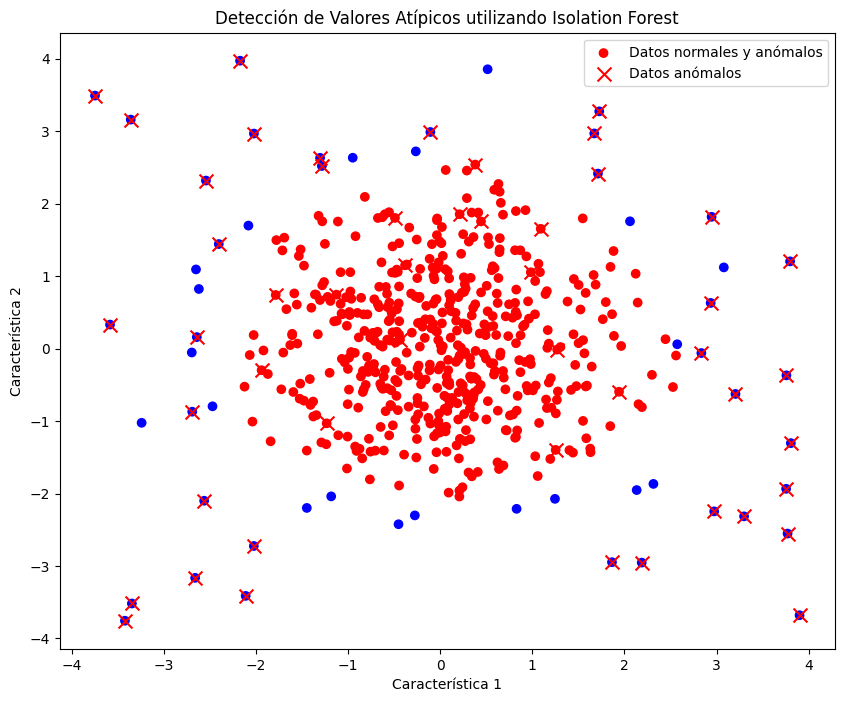

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest

# Generar datos de ejemplo
np.random.seed(42)
X_train = np.random.randn(500, 2)  # Datos normales
X_outliers = np.random.uniform(low=-4, high=4, size=(50, 2))  # Datos anómalos
X = np.r_[X_train, X_outliers]  # Combinar datos normales y anómalos

# Crear y ajustar el modelo
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X)

# Obtener la puntuación de anomalía para cada muestra
scores = clf.decision_function(X)

# Configuración de colores
colors = np.array(['b' if score >= 0 else 'r' for score in scores])

# Graficar los resultados con personalizaciones
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], color=colors, label='Datos normales y anómalos')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', label='Datos anómalos', marker='x', s=100)
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Detección de Valores Atípicos utilizando Isolation Forest')
plt.show()

En este ejemplo, se generan datos de ejemplo con 500 muestras normales y 50 muestras anómalas. El modelo `IForest` se entrena con un nivel de contaminación del 10% (indicando que se espera que alrededor del 10% de los datos sean anómalos). Luego se obtiene la puntuación de anomalía para cada muestra y se grafican los datos normales en azul y los datos anómalos en rojo.

* **Local Outlier Factor (LOF):** Este algoritmo se basa en la densidad local de los datos para detectar valores atípicos. Calcula la desviación de la densidad local de una muestra en comparación con sus vecinos. Las muestras con una densidad local significativamente menor que la de sus vecinos se consideran anómalas. Veamos un ejemplo:

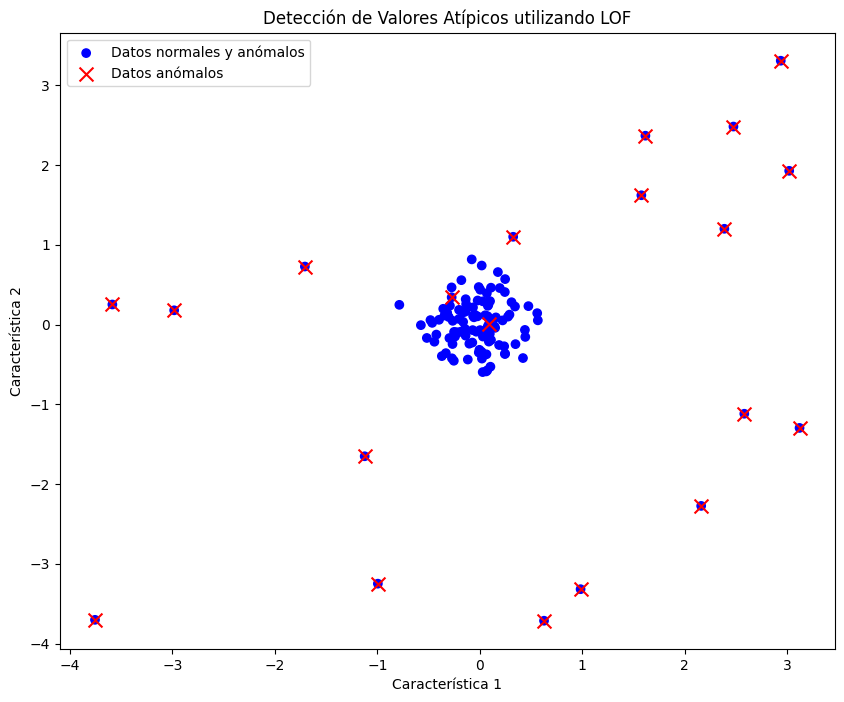

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.lof import LOF

# Generar datos de ejemplo
np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)  # Datos normales
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # Datos anómalos
X = np.r_[X_train, X_outliers]  # Combinar datos normales y anómalos

# Crear y ajustar el modelo
clf = LOF(contamination=0.1)
clf.fit(X)

# Obtener la puntuación de anomalía para cada muestra
scores = clf.decision_function(X)

# Configuración de colores
colors = np.array(['b' if score >= 0 else 'r' for score in scores])

# Graficar los resultados con personalizaciones
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], color=colors, label='Datos normales y anómalos')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', label='Datos anómalos', marker='x', s=100)
plt.legend()
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.title('Detección de Valores Atípicos utilizando LOF')
plt.show()

En este ejemplo, se generan datos de ejemplo con 100 muestras normales y 20 muestras anómalas. El modelo `LOF` se entrena con un nivel de contaminación del 10%. Luego se obtiene la puntuación de anomalía para cada muestra y se grafican los datos normales en azul y los datos anómalos en rojo.

Estos son solo dos ejemplos de las estrategias de detección disponibles en `PyOD`. La biblioteca también proporciona otros algoritmos, como el algoritmo K-means basado en la mediana (`KNN`) y el detector de valores atípicos espectrales (`SOD`). Cada algoritmo tiene sus propias características y es más adecuado para diferentes tipos de datos y escenarios de detección de valores atípicos.

Espero que esta explicación y los ejemplos te ayuden a comprender las diferentes estrategias de detección de valores atípicos disponibles en `PyOD`. Si tienes más preguntas, no dudes en hacerlas.

## **KNN, RF, etc.**

* **K-Nearest Neighbors (KNN):**

El algoritmo K-Nearest Neighbors es un método simple pero efectivo para detectar valores atípicos. Funciona encontrando los `K` vecinos más cercanos a una muestra dada y calculando una puntuación de anomalía en función de la distancia a esos vecinos. Si una muestra tiene vecinos muy distantes, es probable que sea un valor atípico. Veamos un ejemplo:

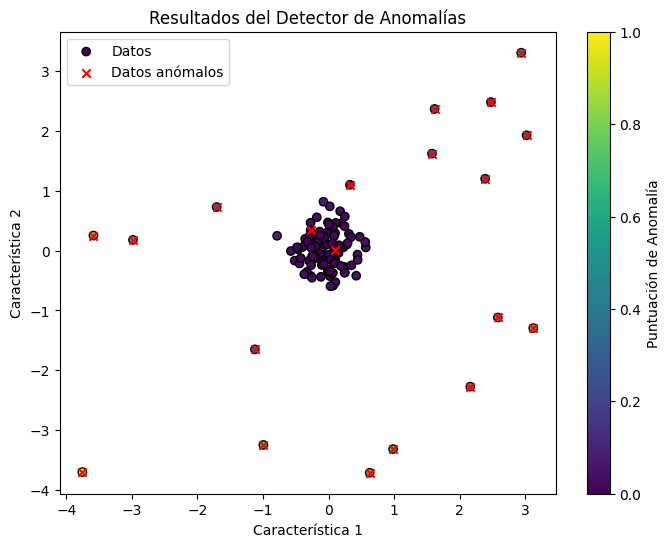

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.knn import KNN

# Generar datos de ejemplo
np.random.seed(42)
X_train = 0.3 * np.random.randn(100, 2)  # Datos normales
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # Datos anómalos
X = np.r_[X_train, X_outliers]  # Combinar datos normales y anómalos

# Crear y ajustar el modelo
clf = KNN(contamination=0.1)
clf.fit(X)

# Obtener la puntuación de anomalía para cada muestra
scores = clf.decision_function(X)

# Personalizar la apariencia del gráfico
plt.figure(figsize=(8, 6))  # Establecer el tamaño de la figura
plt.scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', label='Datos', edgecolors='k', marker='o')  # Personalizar colores y marcadores
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', label='Datos anómalos', marker='x')  # Personalizar color y marcador para anómalos
plt.colorbar(label='Puntuación de Anomalía')  # Mostrar barra de color
plt.title('Resultados del Detector de Anomalías')  # Personalizar el título
plt.xlabel('Característica 1')  # Personalizar etiqueta del eje x
plt.ylabel('Característica 2')  # Personalizar etiqueta del eje y
plt.legend()  # Mostrar leyenda

plt.show()

En este ejemplo, se generan datos de ejemplo con 100 muestras normales y 20 muestras anómalas. El modelo `KNN` se entrena con un nivel de contaminación del 10%. Luego se obtiene la puntuación de anomalía para cada muestra y se grafican los datos normales en azul y los datos anómalos en rojo.

* **Random Forest (RF):**

El algoritmo Random Forest es una técnica de aprendizaje automático que utiliza múltiples árboles de decisión para realizar predicciones y evaluar la importancia de las características. En el contexto de la detección de valores atípicos, se puede utilizar para identificar muestras que son difíciles de clasificar o que tienen características inusuales. Veamos un ejemplo:

/home/puma/anaconda3/lib/python3.9/site-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


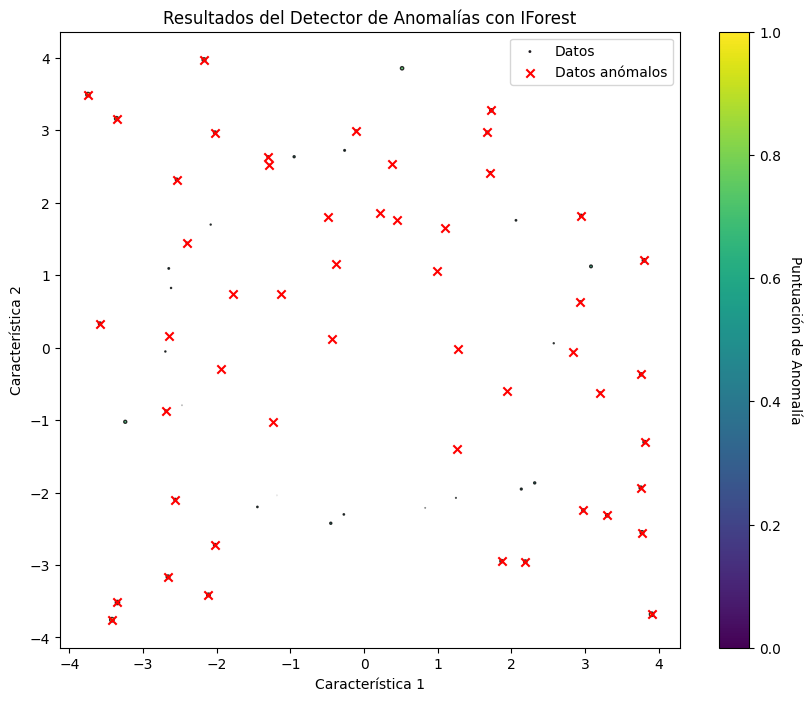

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.models.iforest import IForest

# Generar datos de ejemplo
np.random.seed(42)
X_train = np.random.randn(500, 2)  # Datos normales
X_outliers = np.random.uniform(low=-4, high=4, size=(50, 2))  # Datos anómalos
X = np.r_[X_train, X_outliers]  # Combinar datos normales y anómalos

# Crear y ajustar el modelo
clf = IForest(contamination=0.1, random_state=42)
clf.fit(X)

# Obtener la puntuación de anomalía para cada muestra
scores = clf.decision_function(X)

# Personalizar la apariencia del gráfico
plt.figure(figsize=(10, 8))  # Establecer el tamaño de la figura

# Scatter plot con colores y tamaños según las puntuaciones de anomalía
plt.scatter(X[:, 0], X[:, 1], c=scores, cmap='viridis', s=50 * scores, alpha=0.8, edgecolors='k', label='Datos')

# Scatter plot para los datos anómalos
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='r', label='Datos anómalos', marker='x')

# Barra de color para las puntuaciones de anomalía
cbar = plt.colorbar()
cbar.set_label('Puntuación de Anomalía', rotation=270, labelpad=15)

# Etiquetas y título
plt.title('Resultados del Detector de Anomalías con IForest')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()

plt.show()

En este ejemplo, se generan datos de ejemplo con 500 muestras normales y 50 muestras anómalas. El modelo `Random Forest` se entrena con un nivel de contaminación del 10%. Luego se obtiene la puntuación de anomalía para cada muestra y se grafican los datos normales en azul y los datos anómalos en rojo.

Estos son solo dos ejemplos de algoritmos utilizados en la detección de valores atípicos. Hay muchos otros algoritmos disponibles en `PyOD`, cada uno con sus propias características y enfoques. Puedes explorar más algoritmos y personalizar los parámetros según tus necesidades. Recuerda que el rendimiento y la efectividad de los algoritmos pueden variar según el conjunto de datos y el contexto específico.

Espero que esta explicación y los ejemplos te ayuden a comprender mejor el funcionamiento de `KNN` y `Random Forest` en la detección de valores atípicos. Si tienes más preguntas, no dudes en hacerlas.

## **Análisis Univariante**

El análisis univariante es una técnica utilizada en estadística para analizar una sola variable a la vez. Consiste en examinar y describir las características y patrones de una variable en particular sin considerar la relación con otras variables. El análisis univariante se enfoca en medidas de tendencia central, dispersión y distribución de la variable.

A continuación, te mostraré un ejemplo de análisis univariante utilizando Python y gráficas para ilustrar los conceptos. Supongamos que tenemos un conjunto de datos que contiene las edades de un grupo de personas y queremos realizar un análisis univariante de esta variable.

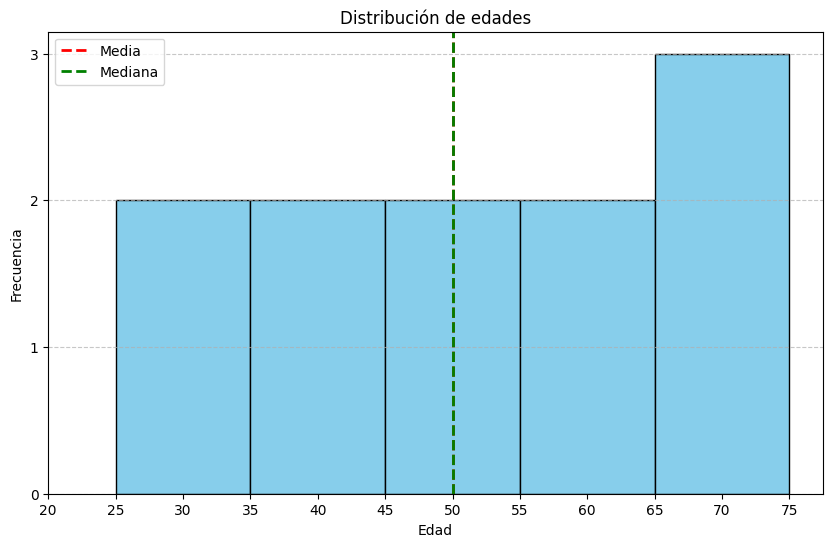

Media: 50.0
Mediana: 50.0
Moda: 25
Rango: 50
Desviación estándar: 15.811388300841896
Varianza: 250.0


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Datos de ejemplo: edades de un grupo de personas
edades = np.array([25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75])

# Medidas de tendencia central
media = np.mean(edades)
mediana = np.median(edades)
moda = np.argmax(np.bincount(edades))

# Medidas de dispersión
rango = np.ptp(edades)
desviacion_estandar = np.std(edades)
varianza = np.var(edades)

# Personalizar la gráfica del histograma
plt.figure(figsize=(10, 6))
plt.hist(edades, bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de edades')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(20, 80, 5))  # Personalizar las etiquetas del eje x
plt.yticks(range(0, 4))       # Personalizar las etiquetas del eje y

# Agregar líneas para indicar medidas de tendencia central
plt.axvline(media, color='red', linestyle='--', linewidth=2, label='Media')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label='Mediana')
plt.legend()

plt.show()

# Imprimir resultados
print("Media:", media)
print("Mediana:", mediana)
print("Moda:", moda)
print("Rango:", rango)
print("Desviación estándar:", desviacion_estandar)
print("Varianza:", varianza)

En este ejemplo, utilizamos la biblioteca `NumPy` y `Matplotlib` en Python. Definimos un conjunto de datos de ejemplo que representa las edades de un grupo de personas. A continuación, calculamos diferentes medidas de tendencia central y dispersión utilizando funciones de `NumPy`, como la media, mediana, moda, rango, desviación estándar y varianza. Luego, utilizamos `Matplotlib` para graficar un histograma que muestra la distribución de las edades.

El análisis univariante nos permite obtener información clave sobre una variable en particular, como la tendencia central (media, mediana, moda), la dispersión (rango, desviación estándar, varianza) y la forma de distribución. Estas medidas y gráficas nos ayudan a comprender mejor los datos y extraer información relevante.

Es importante tener en cuenta que el análisis univariante es solo una parte del análisis de datos más completo. Para obtener una comprensión completa de los datos, es necesario considerar las relaciones entre diferentes variables utilizando técnicas de análisis multivariante.

Espero que esta explicación y el ejemplo te ayuden a comprender mejor el análisis univariante y cómo aplicarlo en Python. Si tienes más preguntas, no dudes en hacerlas.

## **Análisis Multivariante**

El análisis multivariante es una técnica utilizada en estadística y ciencias de datos para analizar simultáneamente múltiples variables y examinar las relaciones y patrones entre ellas. A diferencia del análisis univariante que se centra en una sola variable, el análisis multivariante permite explorar la interdependencia entre varias variables y revelar estructuras ocultas en los datos.

A continuación, te mostraré un ejemplo de análisis multivariante utilizando Python y gráficas para ilustrar los conceptos. Supongamos que tenemos un conjunto de datos que contiene las características (edad, ingresos y nivel educativo) de un grupo de personas, y queremos realizar un análisis multivariante de estas variables.

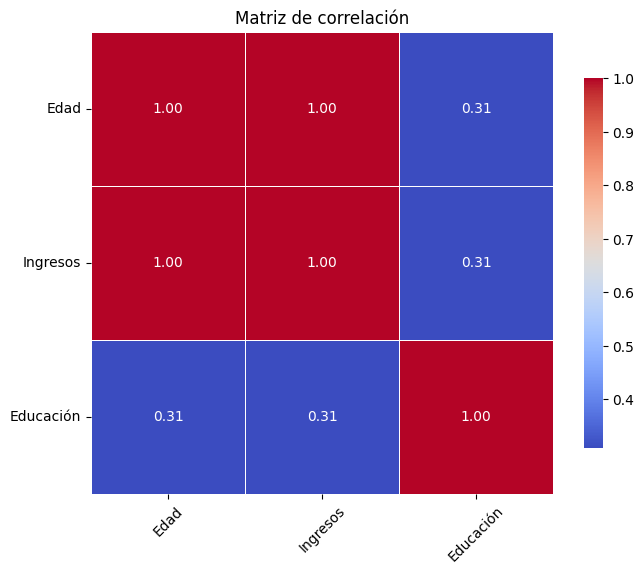

/home/puma/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x800 with 0 Axes>

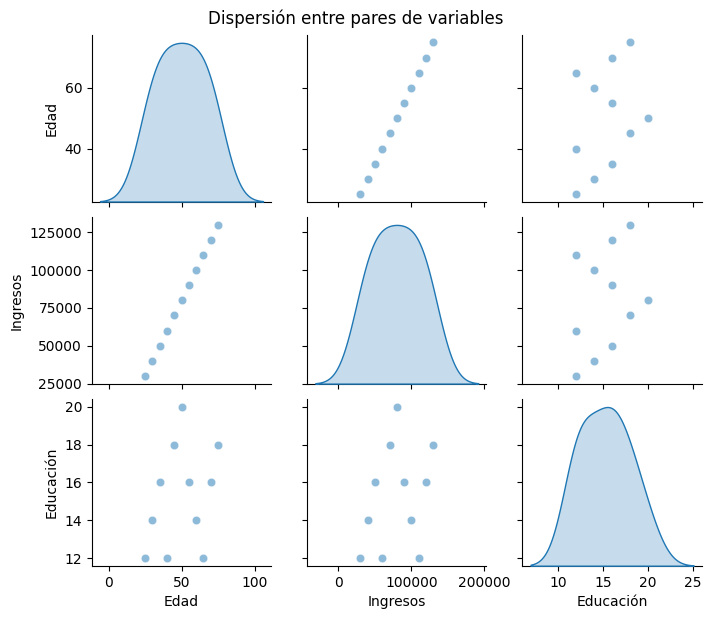

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo: características de un grupo de personas
datos = pd.DataFrame({
    'Edad': [25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75],
    'Ingresos': [30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000, 120000, 130000],
    'Educación': [12, 14, 16, 12, 18, 20, 16, 14, 12, 16, 18]
})

# Matriz de correlación
correlacion = datos.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar matriz de correlación con personalización
sns.heatmap(correlacion, annot=True, cmap='coolwarm', linewidths=.5, square=True, fmt=".2f", cbar_kws={"shrink": 0.8})
plt.title('Matriz de correlación')

# Ajustar las etiquetas de los ejes para que estén centradas
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Mostrar la gráfica
plt.show()

# Configurar el tamaño de la figura para el pairplot
plt.figure(figsize=(10, 8))

# Graficar dispersión entre pares de variables con personalización
sns.pairplot(datos, height=2, aspect=1.2, markers='o', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle('Dispersión entre pares de variables', y=1.02)

# Mostrar la gráfica
plt.show()

En este ejemplo, utilizamos las bibliotecas NumPy, Pandas, Seaborn y Matplotlib en Python. Definimos un conjunto de datos de ejemplo que contiene las características de un grupo de personas. A continuación, calculamos la matriz de correlación utilizando el método `corr()` de Pandas, que nos muestra las relaciones lineales entre las variables. Luego, utilizamos Seaborn para graficar una matriz de calor que visualiza la correlación entre las variables. Además, utilizamos Seaborn para graficar una matriz de dispersión (`scatter plot`) que muestra las relaciones entre pares de variables.

El análisis multivariante nos permite explorar las relaciones entre múltiples variables y comprender cómo se interrelacionan. La matriz de correlación nos ayuda a identificar la fuerza y dirección de las relaciones lineales entre las variables. Además, la matriz de dispersión nos permite visualizar patrones y tendencias entre pares de variables.

Es importante destacar que el análisis multivariante puede implicar técnicas más avanzadas, como análisis de componentes principales (`PCA`), análisis de clusters, análisis discriminante, entre otros. Estas técnicas permiten reducir la dimensionalidad de los datos, agrupar observaciones similares o realizar clasificaciones basadas en múltiples variables.

Espero que esta explicación y el ejemplo te ayuden a comprender mejor el análisis multivariante y cómo aplicarlo en Python. Recuerda que el análisis multivariante es una herramienta poderosa para extraer información y revelar patrones complejos en conjuntos de datos. Si tienes más preguntas, no dudes en hacerlas.

## **Interpretando resultados**

La interpretación de resultados es una etapa crucial en cualquier análisis de datos. Consiste en comprender y comunicar los hallazgos y conclusiones obtenidas a partir de los análisis estadísticos o de aprendizaje automático realizados. En esta etapa, se busca dar sentido a los resultados, extraer insights relevantes y tomar decisiones informadas basadas en la información obtenida.

A continuación, te mostraré un ejemplo de interpretación de resultados utilizando Python y gráficas para ilustrar los conceptos. Supongamos que hemos realizado un análisis de regresión lineal para predecir los precios de las viviendas en función de variables como el área de la vivienda y el número de habitaciones.

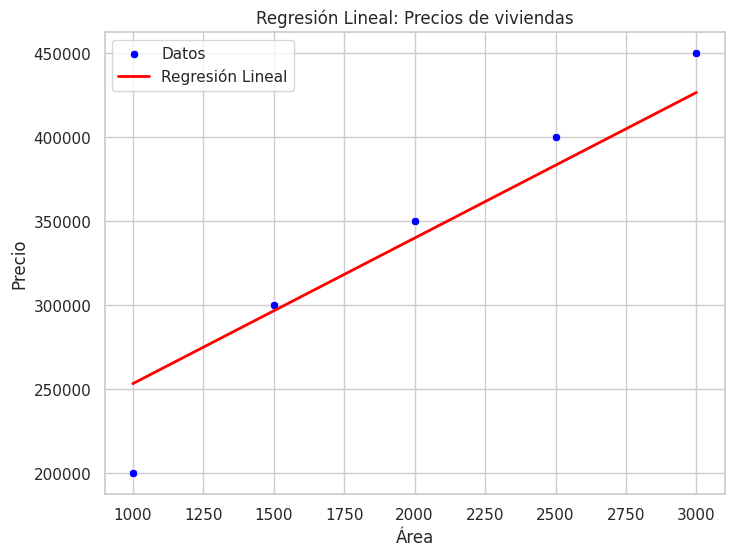

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Datos de ejemplo: precios de viviendas
datos = pd.DataFrame({
    'Area': [1000, 1500, 2000, 2500, 3000],
    'Habitaciones': [2, 3, 3, 4, 4],
    'Precio': [200000, 300000, 350000, 400000, 450000]
})

# Dividir los datos en variables independientes (X) y variable dependiente (y)
X = datos[['Area', 'Habitaciones']]
y = datos['Precio']

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_
intercepto = modelo.intercept_

# Generar valores para la línea de regresión
x_line = np.linspace(X['Area'].min(), X['Area'].max(), 100)
y_line = intercepto + coeficientes[0] * x_line + coeficientes[1] * X['Habitaciones'].mean()

# Configurar el estilo de la gráfica
sns.set(style="whitegrid")

# Configurar el tamaño de la figura
plt.figure(figsize=(8, 6))

# Graficar los datos y la línea de regresión con personalización
sns.scatterplot(x='Area', y='Precio', data=datos, color='blue', label='Datos')
plt.plot(x_line, y_line, color='red', label='Regresión Lineal', linewidth=2)

# Añadir etiquetas y título
plt.title('Regresión Lineal: Precios de viviendas')
plt.xlabel('Área')
plt.ylabel('Precio')

# Añadir una leyenda
plt.legend()

# Mostrar la gráfica
plt.show()

En este ejemplo, utilizamos las bibliotecas NumPy, Pandas, Seaborn y Matplotlib en Python. Definimos un conjunto de datos de ejemplo que contiene el área de las viviendas, el número de habitaciones y los precios. Ajustamos un modelo de regresión lineal utilizando la clase `LinearRegression` de Scikit-learn y obtenemos los coeficientes del modelo. Luego, utilizamos Seaborn y Matplotlib para graficar los datos de las viviendas y la línea de regresión.

La interpretación de los resultados en este caso implica analizar los coeficientes del modelo de regresión lineal. Cada coeficiente representa el cambio promedio en la variable dependiente (precio de la vivienda) cuando la variable independiente correspondiente (área o número de habitaciones) aumenta en una unidad, manteniendo las otras variables constantes. Por ejemplo, si el coeficiente correspondiente al área es 500, significa que, en promedio, cada unidad adicional de área se asocia con un incremento de 500 en el precio de la vivienda.

Además, al graficar los datos y la línea de regresión, podemos visualizar cómo se ajusta el modelo a los datos. Si la línea de regresión se ajusta bien a los puntos de datos, indica una relación lineal fuerte entre las variables y una buena capacidad del modelo para predecir los precios de las viviendas.

Es importante tener en cuenta que la interpretación de los resultados puede variar según el tipo de análisis realizado y el contexto específico del problema. Además, en análisis más complejos, como modelos de aprendizaje automático o técnicas de análisis multivariante, la interpretación puede requerir un análisis más detallado de los resultados y la consideración de múltiples variables y relaciones.

Espero que este ejemplo te ayude a comprender mejor el proceso de interpretación de resultados y cómo utilizar gráficas para visualizar los resultados obtenidos. Recuerda que la interpretación adecuada de los resultados es esencial para tomar decisiones informadas y extraer conocimientos útiles de los análisis de datos. Si tienes más preguntas, no dudes en hacerlas.

| **Inicio** | **atrás 1** | **Siguiente 3** |
|----------- |-------------- |---------------|
| [🏠](../../../README.md) | [⏪](./1.IMPUTACION_DE_DATOS.ipynb)| [⏩](./3.SELECCION_DE_CARACTERISTICAS.ipynb)|